<a href="https://colab.research.google.com/github/Patriciah1/PROJECT---4.1-and-4.2-JKUAT/blob/main/Project_Work_Financial_Literacy_Surveys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PERSONALIZED FINANCIAL EDUCATION-CLOSING GENDER GAPS WITH RECOMMENDER SYSTEMS**

In [ ]:
#import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# DATA PREPROCESSING

Data preprocessing is the process of cleaning, transforming, and preparing raw data before applying machine learning (ML) models or conducting analysis. It ensures that the data is in a suitable format, free from inconsistencies, and ready for accurate modeling.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving financial literacy survey adults_annex d.xlsx to financial literacy survey adults_annex d.xlsx


In [ ]:
# Get the filename from the uploaded dictionary
file_path = list(uploaded.keys())[0]

In [ ]:
# Load Table 2.1 (Overall Financial Literacy Scores) and Table 2.3 (Demographics Breakdown)
df_financial_literacy_scores = pd.read_excel(file_path, sheet_name="Table 2.1", skiprows=4)
df_demographics = pd.read_excel(file_path, sheet_name="Table 2.3", skiprows=4)

In [ ]:
# Display original column names before renaming
print("Original Table 2.1 Column Names:", df_financial_literacy_scores.columns.tolist())
print("Original Table 2.3 Column Names:", df_demographics.columns.tolist())

Original Table 2.1 Column Names: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
Original Table 2.3 Column Names: ['Unnamed: 0', 'Gender', 'Unnamed: 2', 'Age', 'Unnamed: 4', 'Unnamed: 5', 'Education level', 'Unnamed: 7', 'Unnamed: 8', 'Occupation', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Location', 'Unnamed: 14', 'Unnamed: 15', 'Income', 'Unnamed: 17', 'Unnamed: 18']


In [ ]:
# Rename columns for clarity in Table 2.1
df_financial_literacy_scores.columns = ["Country", "Financial Knowledge", "Financial Behavior", "Financial Attitudes", "Overall Score"]
df_financial_literacy_scores.dropna(inplace=True)

In [ ]:
# Rename columns for clarity in Table 2.3
df_demographics.columns = ["Country", "Female", "Male", "18-29", "30-59", "60+", "Less than Secondary", "Secondary",
                   "More than Secondary", "Employees", "Self-employed", "Unemployed", "Out of Labour Force",
                   "Rural", "Town", "City", "Low Income", "Medium Income", "High Income"]
df_demographics.dropna(inplace=True)

In [ ]:
# Display the first 5 rows of Table 2.1
print("Table 2.1 - Overall Financial Literacy Scores:")
df_financial_literacy_scores.head()

Table 2.1 - Overall Financial Literacy Scores:


,Country,Financial Knowledge,Financial Behavior,Financial Attitudes,Overall Score
0,Country or Economy,Financial Knowledge Score (out of 35),Financial Behaviour Score (out of 45),Financial Attitudes Score (out of 20),Financial Literacy Score (out of 100)
1,Albania,20.15941,22.994884,13.245693,56.399986
2,Brazil,18.557501,30.49,10.59125,59.638748
3,Cambodia,14.531676,23.78723,10.289666,48.60857
4,Chile,21.588284,24.488449,10.030941,56.107674


In [ ]:
# Display the first 5 rows of Table 2.3
print("\nTable 2.3 - Demographics Breakdown:")
df_demographics.head()


Table 2.3 - Demographics Breakdown:


,Country,Female,Male,18-29,30-59,60+,Less than Secondary,Secondary,More than Secondary,Employees,Self-employed,Unemployed,Out of Labour Force,Rural,Town,City,Low Income,Medium Income,High Income
0,Country or Economy,Female,Male,18-29,30-59,60 and over,Less than secondary,Secondary,More than secondary,Employees,Self-employed,Unemployed,Out of labour force,"Village/ Rural area (fewer than 3,000 people)","Town (3,000 - 100,000 people)","City (100,000 people and over)",Low,Medium,High
1,Albania,54.672119,58.179199,56.531162,57.886932,53.449467,50.898232,57.056107,61.674011,60.777798,58.175327,51.876781,51.654358,54.67244,57.584679,-,50.995121,57.536053,63.088867
2,Brazil,57.754478,61.748402,64.383331,59.821754,53.549759,52.409397,62.139008,69.087425,64.033974,61.207115,56.593136,53.778065,56.71875,58.913044,60.39756,56.025227,60.607769,64.347321
3,Cambodia,48.173859,49.089169,51.614895,48.615246,40.573215,45.697891,52.105564,63.45155,54.06229,47.277714,45.905247,45.878338,52.14016,46.039078,-,46.156258,51.715416,53.418541
4,Chile,55.613773,56.714153,51.964287,57.285713,51.921181,47.64706,55.998474,64.463028,58.424999,56.762749,52.876343,52.069378,51.875,56.625,-,51.127098,56.21822,65.304619


In [ ]:
#Ensures all financial literacy scores are numeric
for col in df_demographics.columns[1:]:
    df_demographics[col] = pd.to_numeric(df_demographics[col], errors='coerce')

In [ ]:
# Summary statistics
print("Summary Statistics:")
df_demographics.describe()

Summary Statistics:


,Female,Male,18-29,30-59,60+,Less than Secondary,Secondary,More than Secondary,Employees,Self-employed,Unemployed,Out of Labour Force,Rural,Town,City,Low Income,Medium Income,High Income
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,40.000000,40.000000,40.000000,40.000000,35.000000,36.000000,28.000000,40.000000,40.000000,40.000000
mean,59.301495,61.613611,59.180978,61.567366,58.147090,55.462535,62.908645,67.553175,63.024794,62.507180,53.601078,56.982904,57.744116,59.217061,62.117311,55.454936,61.631081,66.386365
std,6.429612,6.767100,6.664492,6.879025,8.186583,6.432134,6.396366,6.509453,5.624987,7.105493,6.071877,6.795198,6.995945,6.349508,6.544096,5.927607,6.186990,6.213409
min,40.992931,44.091385,43.622879,42.515732,35.860771,38.951725,45.062019,51.907894,47.169624,45.562016,35.000000,39.343697,41.270611,43.276051,46.311340,40.263309,44.389889,51.340847
25%,55.115383,57.247181,56.323933,57.285713,53.449467,51.539761,60.053635,63.575951,59.399472,57.954643,50.285614,52.643052,52.911835,56.478971,57.850827,51.469912,57.497847,62.479762
50%,58.276711,61.690014,58.621212,60.574223,58.066244,55.393612,63.016075,68.672249,62.461685,62.431087,54.113797,56.848850,57.500000,58.319328,61.966655,55.629240,61.084133,66.489182
75%,63.487141,65.707680,62.647133,66.124962,64.454987,58.529152,64.949516,71.422211,66.680542,67.600515,58.411662,62.272902,61.588416,63.219857,66.222567,60.235184,66.137402,71.031702
max,74.683891,77.260445,74.905792,77.171936,74.356583,69.254059,76.591637,81.594292,77.872635,76.495270,63.960144,73.408775,74.315033,76.244743,75.902527,68.270805,75.542641,79.945038


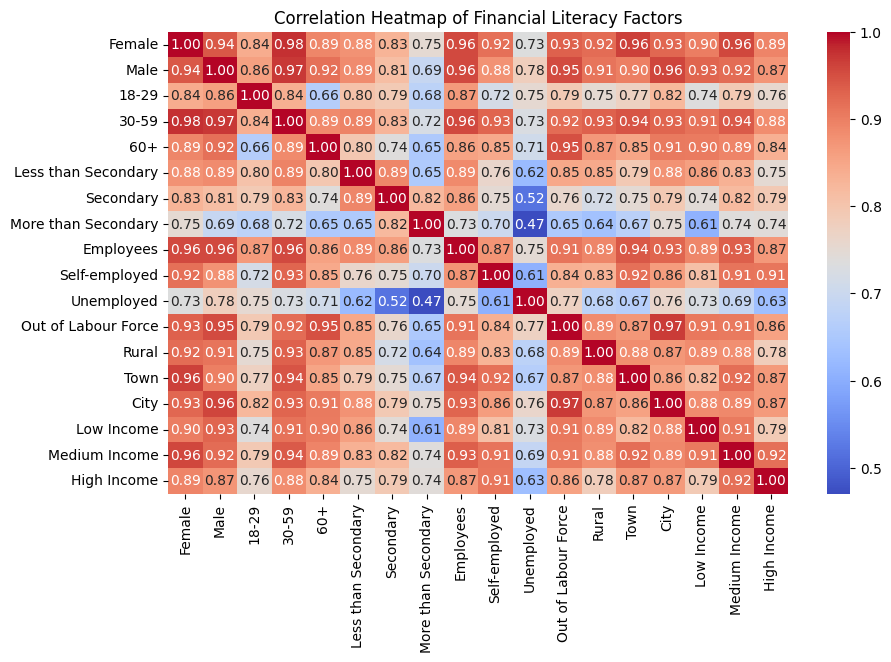

In [ ]:
# Select only numeric columns for correlation
numeric_df = df_demographics.select_dtypes(include='number')

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Financial Literacy Factors')
plt.show()

# **Analyzing Gender Gaps in Financial Literacy**

We will compare financial literacy scores between males and females to identify gender gaps.

If the Gender Gap is positive (+) it means Males have higher financial literacy than females. If the Gender Gap is negative (-) it means Females have higher financial literacy than males. The larger the gap, the more inequality exists between genders. This analysis helps identify which countries have larger gender gaps and where interventions may be needed to improve financial literacy for women.

In [ ]:
# Rename relevant columns
df_demographics = df_demographics.rename(columns={"Country": "Country", "Female": "Female Score", "Male": "Male Score"})

In [ ]:
# Drop missing values
df_demographics.dropna(subset=["Female Score", "Male Score"], inplace=True)

In [ ]:
# Calculate gender gap (Male Score - Female Score)
df_demographics["Gender Gap"] = df_demographics["Male Score"] - df_demographics["Female Score"]

In [ ]:
df_demographics["Gender Gap"]

,Gender Gap
1,3.507080
2,3.993923
3,0.915310
4,1.100380
5,2.717949
6,-0.230961
7,1.877514
8,3.292625
9,2.161091
10,1.537422


In [ ]:
print("Average Gender Gap:", df_demographics["Gender Gap"].mean())

Average Gender Gap: 2.3121160682549395


In [ ]:
print("Country with Highest Gender Gap:")
print(df_demographics.loc[df_demographics["Gender Gap"].idxmax(), ["Country", "Gender Gap"]])

print("\nCountry with Lowest Gender Gap:")
print(df_demographics.loc[df_demographics["Gender Gap"].idxmin(), ["Country", "Gender Gap"]])


Country with Highest Gender Gap:
Country       Saudi Arabia 
Gender Gap        10.844402
Name: 34, dtype: object

Country with Lowest Gender Gap:
Country       Hungary 
Gender Gap   -0.769474
Name: 14, dtype: object


In [ ]:
# Summary Statistics
print("Summary of Gender Gaps in Financial Literacy:")
df_demographics[["Female Score", "Male Score", "Gender Gap"]].describe()

Summary of Gender Gaps in Financial Literacy:


,Female Score,Male Score,Gender Gap
count,41.000000,41.000000,41.000000
mean,59.301495,61.613611,2.312116
std,6.429612,6.767100,2.280244
min,40.992931,44.091385,-0.769474
25%,55.115383,57.247181,0.844456
50%,58.276711,61.690014,2.182178
75%,63.487141,65.707680,3.195656
max,74.683891,77.260445,10.844402


<ipython-input-21-5ae4c0ba6187>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Female', 'Male'],


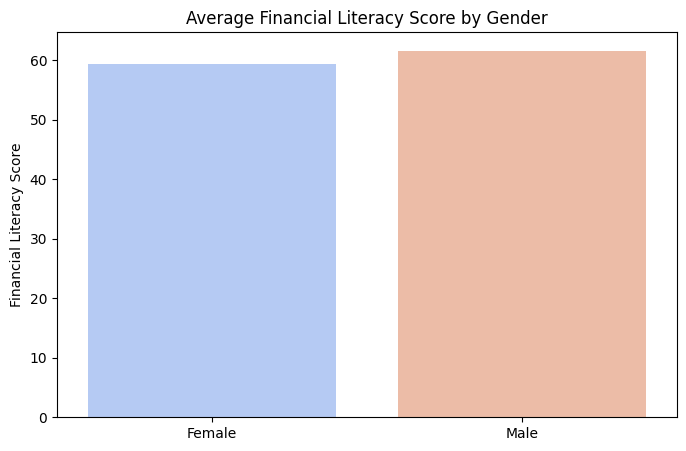

In [ ]:
# Visualization : Average Financial Literacy by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x=['Female', 'Male'],
            y=[df_demographics['Female Score'].mean(), df_demographics['Male Score'].mean()],
            palette='coolwarm')
plt.title('Average Financial Literacy Score by Gender')
plt.ylabel('Financial Literacy Score')
plt.show()

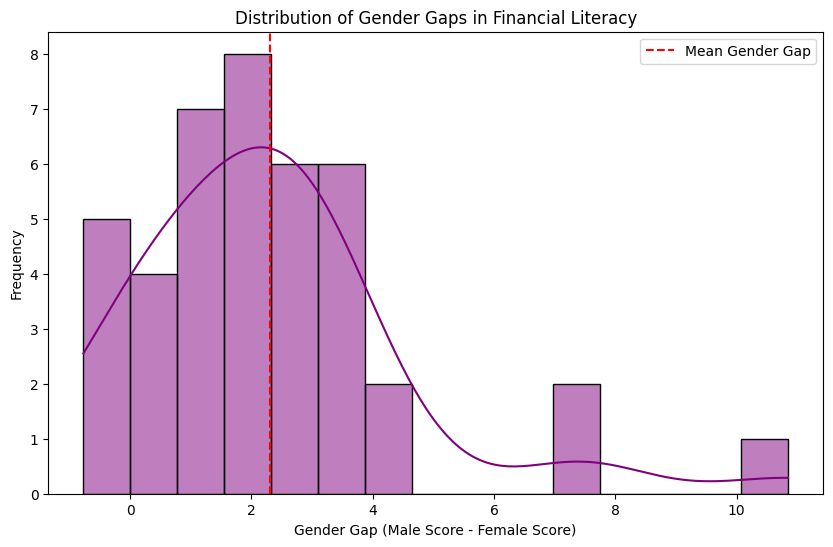

In [ ]:
# Visualization: Distribution of Gender Gaps Across Countries
plt.figure(figsize=(10, 6))
sns.histplot(df_demographics["Gender Gap"], bins=15, kde=True, color="purple")
plt.axvline(df_demographics["Gender Gap"].mean(), color='red', linestyle='dashed', label="Mean Gender Gap")
plt.title('Distribution of Gender Gaps in Financial Literacy')
plt.xlabel('Gender Gap (Male Score - Female Score)') # Added x-axis label
plt.ylabel('Frequency') # Added y-axis label
plt.legend()
plt.show()

The Gender Gap scores in financial literacy reveal a consistent trend across most countries in the dataset: males tend to have higher financial literacy levels than females. This is evident from the predominantly positive gender gap scores.

A particularly striking case is Saudi Arabia, where the gender gap score reaches 10.84, indicating a significant disparity between men and women in financial literacy. Such a large gap suggests systemic factors—such as cultural, educational, or economic barriers—may be limiting women's access to financial knowledge and skills.

# **Analyzing How Education Level Affects Financial Literacy**

We will analyze how different education levels impact financial literacy scores

In [ ]:
df_demographics.columns

Index(['Country', 'Female Score', 'Male Score', '18-29', '30-59', '60+',
       'Less than Secondary', 'Secondary', 'More than Secondary', 'Employees',
       'Self-employed', 'Unemployed', 'Out of Labour Force', 'Rural', 'Town',
       'City', 'Low Income', 'Medium Income', 'High Income', 'Gender Gap'],
      dtype='object')

In [ ]:
# Rename relevant columns
df_demographics = df_demographics.rename(columns={
    "Country": "Country",
    "Less than Secondary": "Less than Secondary",
    "Secondary": "Secondary",
    "More than Secondary": "More than Secondary"
})

In [ ]:
# Drop missing values
df_demographics.dropna(subset=["Less than Secondary", "Secondary", "More than Secondary"], inplace=True)

In [ ]:
# Summary Statistics
print("Summary of Financial Literacy by Education Level:")
print(df_demographics[["Less than Secondary", "Secondary", "More than Secondary"]].describe())

Summary of Financial Literacy by Education Level:
       Less than Secondary  Secondary  More than Secondary
count            41.000000  41.000000            41.000000
mean             55.462535  62.908645            67.553175
std               6.432134   6.396366             6.509453
min              38.951725  45.062019            51.907894
25%              51.539761  60.053635            63.575951
50%              55.393612  63.016075            68.672249
75%              58.529152  64.949516            71.422211
max              69.254059  76.591637            81.594292


<ipython-input-28-d7c8a22660a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Less than Secondary', 'Secondary', 'More than Secondary'],


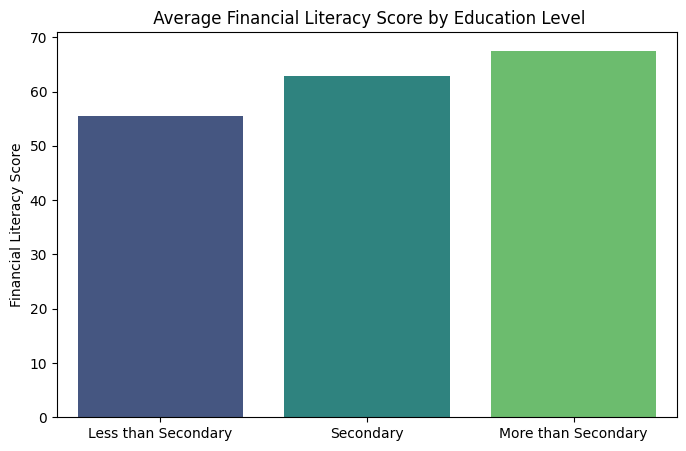

In [ ]:
# Visualization: Average Financial Literacy by Education Level
plt.figure(figsize=(8, 5))
sns.barplot(x=['Less than Secondary', 'Secondary', 'More than Secondary'],
            y=[df_demographics['Less than Secondary'].mean(),
               df_demographics['Secondary'].mean(),
               df_demographics['More than Secondary'].mean()],
            palette='viridis')
plt.title(' Average Financial Literacy Score by Education Level')
plt.ylabel('Financial Literacy Score')
plt.show()


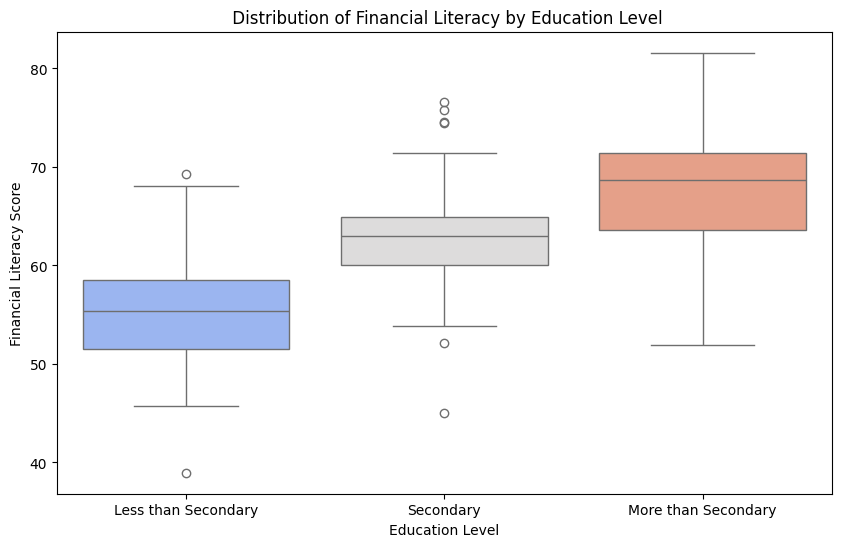

In [ ]:
# Visualization 2: Distribution of Financial Literacy Scores by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_demographics[["Less than Secondary", "Secondary", "More than Secondary"]], palette="coolwarm")
plt.title(" Distribution of Financial Literacy by Education Level")
plt.ylabel("Financial Literacy Score")
plt.xlabel("Education Level")
plt.show()

Interpretation

Higher education levels equal Higher financial literacy scores

The analysis of the "Distribution of Financial Literacy Scores by Education Level" using a boxplot clearly shows a trend: as the level of education increases (from "Less than Secondary" to "Secondary" and then to "More than Secondary"), the financial literacy scores tend to rise.

This suggests that individuals with more years of schooling and higher educational attainment generally possess a better understanding of financial concepts and practices. The boxplot also indicates that while there is variation within each education level, the median and overall distribution of scores shift upwards for those with higher education.

In essence, the analysis supports the idea that education provides individuals with the foundational knowledge and critical thinking skills necessary to comprehend and manage financial matters more effectively, leading to higher financial literacy scores.

# **Urban vs. Rural Financial Literacy Analysis**

In [ ]:
# Calculate mean scores for each location type
rural_mean = df_demographics["Rural"].mean()
town_mean = df_demographics["Town"].mean()
city_mean = df_demographics["City"].mean()

In [ ]:
# Display results
print("Average Financial Literacy Scores by Area:")
print(f"Rural Areas: {rural_mean:.2f}")
print(f"Towns: {town_mean:.2f}")
print(f"Cities: {city_mean:.2f}")

Average Financial Literacy Scores by Area:
Rural Areas: 57.74
Towns: 59.22
Cities: 62.12


<ipython-input-32-d0080cc807e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Rural", "Town", "City"], y=[rural_mean, town_mean, city_mean], palette="coolwarm")


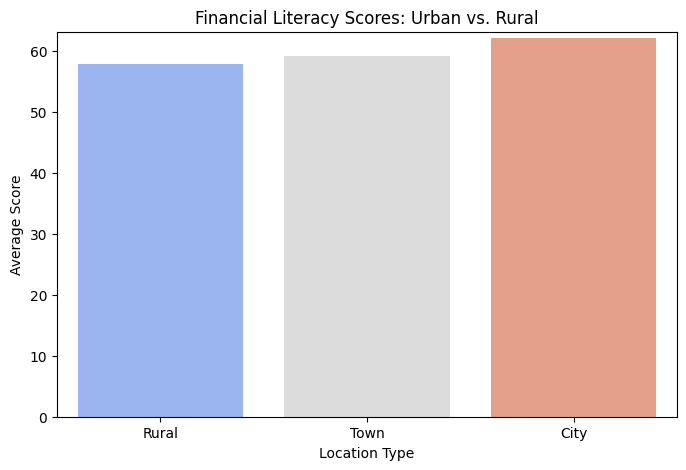

In [ ]:
# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=["Rural", "Town", "City"], y=[rural_mean, town_mean, city_mean], palette="coolwarm")
plt.title("Financial Literacy Scores: Urban vs. Rural")
plt.ylabel("Average Score")
plt.xlabel("Location Type")
plt.ylim(0, max(rural_mean, town_mean, city_mean) + 1)  # Adjust y-axis for better visualization
plt.show()

The analysis shows a clear trend where financial literacy scores increase as we move from rural areas to towns and then to cities.

Financial literacy is highest in cities and lowest in rural areas, likely due to better access to education, financial services, and job-related financial exposure in urban areas. The gap can be addressed by expanding financial education programs to rural regions and leveraging technology, such as mobile banking, to improve financial knowledge.

# **Performing ANOVA to Test Statistical Significance**

We will use ANOVA (Analysis of Variance) to determine if the differences in financial literacy scores between Rural, Town, and City are statistically significant.

A low p-value (typically < 0.05) means there is a significant difference between the groups.

In [ ]:
import scipy.stats as stats

# Perform ANOVA test
anova_result = stats.f_oneway(df_demographics["Rural"].dropna(),
                              df_demographics["Town"].dropna(),
                              df_demographics["City"].dropna())

# Display results
print("ANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.5f}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("\n The differences in financial literacy scores between Rural, Town, and City are statistically significant!")
    print("This means location does have a real impact on financial literacy levels.")
else:
    print("\n The differences are NOT statistically significant.")
    print("This means the variation in financial literacy across locations could be due to random chance.")


ANOVA Test Results:
F-statistic: 3.43
P-value: 0.03633

 The differences in financial literacy scores between Rural, Town, and City are statistically significant!
This means location does have a real impact on financial literacy levels.


# **Highest vs. Lowest Financial Literacy Countries**

In [ ]:
# Ensure the "Overall Score" column is numeric
df_financial_literacy_scores["Overall Score"] = pd.to_numeric(df_financial_literacy_scores["Overall Score"], errors="coerce")

In [ ]:
# Display the top 5 countries with the highest financial literacy scores
top_countries = df_financial_literacy_scores.sort_values(by="Overall Score", ascending=False).head(5)

In [ ]:
# Display the bottom 5 countries with the lowest financial literacy scores
bottom_countries = df_financial_literacy_scores.sort_values(by="Overall Score", ascending=True).head(5)

In [ ]:
# Print results
print("Top 5 Countries with the Highest Financial Literacy Scores:")
top_countries[["Country", "Overall Score"]]

Top 5 Countries with the Highest Financial Literacy Scores:


,Country,Overall Score
11,Germany,75.970123
37,Thailand,71.380020
13,Hong Kong (China),70.084930
16,Ireland,69.700943
22,Luxembourg,67.784538


In [ ]:
print(" Bottom 5 Countries with the Lowest Financial Literacy Scores:")
bottom_countries[["Country", "Overall Score"]]

 Bottom 5 Countries with the Lowest Financial Literacy Scores:


,Country,Overall Score
39,Yemen,42.335556
3,Cambodia,48.608570
28,Paraguay,49.797180
17,Italy,53.337349
33,Romania,54.037312


<ipython-input-39-c9f0ed30ab77>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="Overall Score", y="Country", palette="Greens_r")


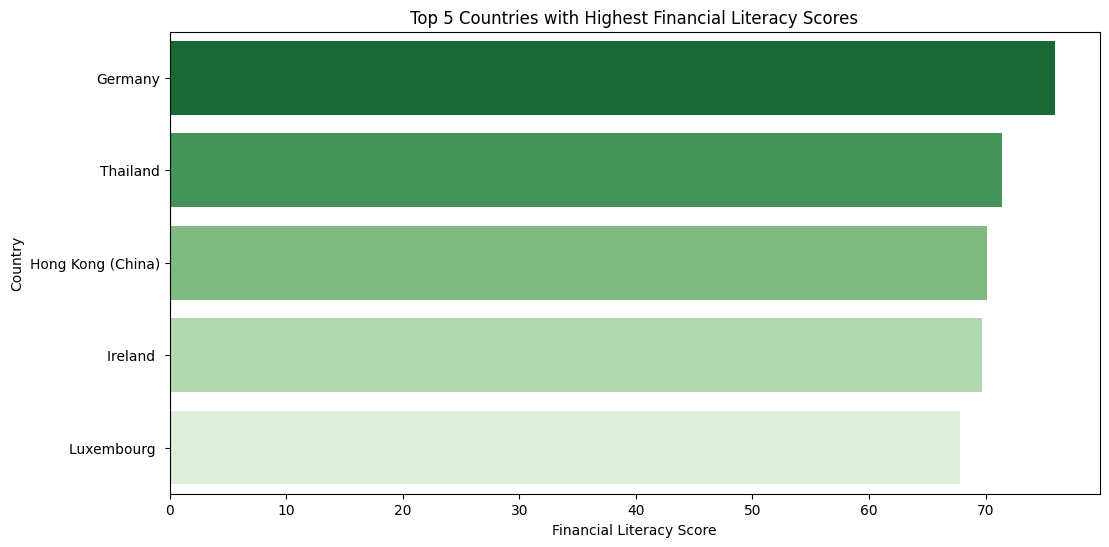

<ipython-input-39-c9f0ed30ab77>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_countries, x="Overall Score", y="Country", palette="Reds_r")


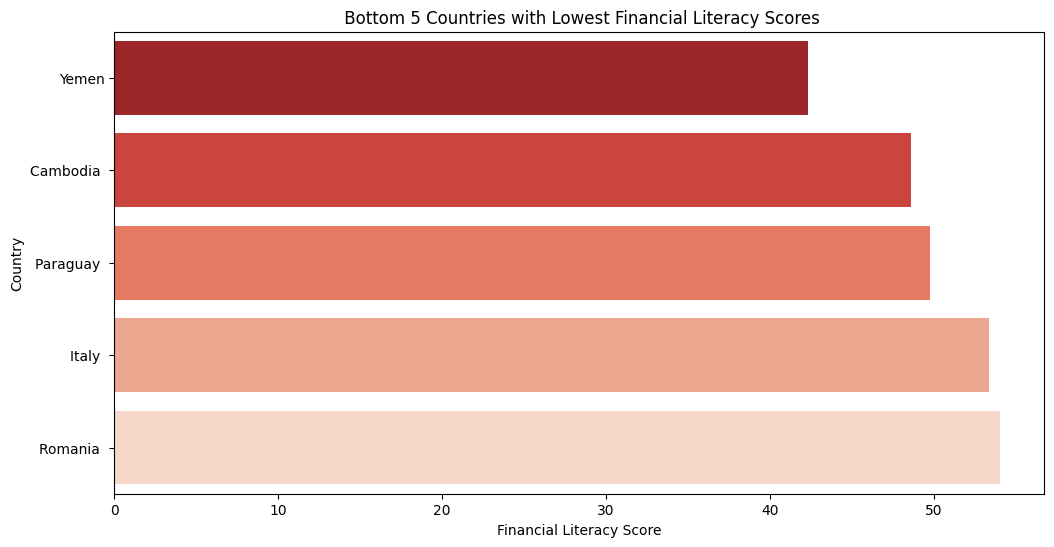

In [ ]:
# Visualization: Bar Plot of Top & Bottom 5 Countries
plt.figure(figsize=(12, 6))

# Top 5 countries
sns.barplot(data=top_countries, x="Overall Score", y="Country", palette="Greens_r")
plt.title("Top 5 Countries with Highest Financial Literacy Scores")
plt.xlabel("Financial Literacy Score")
plt.ylabel("Country")
plt.show()

# Bottom 5 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_countries, x="Overall Score", y="Country", palette="Reds_r")
plt.title(" Bottom 5 Countries with Lowest Financial Literacy Scores")
plt.xlabel("Financial Literacy Score")
plt.ylabel("Country")
plt.show()


# **Digital Financial Literacy vs. Overall Financial Literacy**

In [ ]:
# Load the dataset (Table 3.1)
file_path = "financial literacy survey adults_annex d.xlsx"
df_digital = pd.read_excel(file_path, sheet_name="Table 3.1", skiprows=4)

In [ ]:
# Rename columns for easier access
df_digital.columns = ["Country", "Digital Literacy (All Adults)", "Digital Literacy (Adults with Internet Access)"]

In [ ]:
# Convert scores to numeric
df_digital.iloc[:, 1:] = df_digital.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

In [ ]:
# Display first few rows
df_digital.head()

,Country,Digital Literacy (All Adults),Digital Literacy (Adults with Internet Access)
0,Country or Economy,NaN,NaN
1,Albania,38.999836,40.669434
2,Brazil,62.939999,64.526611
3,Cambodia,NaN,42.606411
4,Chile,60.684818,61.722576


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
df_digital.describe()


Summary Statistics:


,Country,Digital Literacy (All Adults),Digital Literacy (Adults with Internet Access)
count,49,30.000000,29.000000
unique,49,30.000000,29.000000
top,Country or Economy,38.999836,40.669434
freq,1,1.000000,1.000000


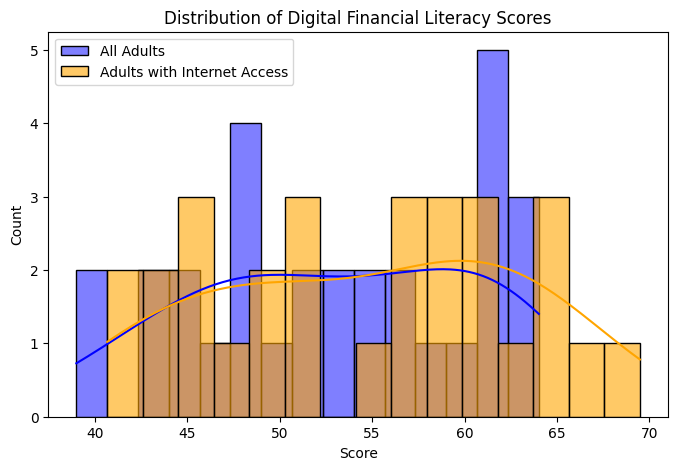

In [ ]:
# Histogram of Digital Financial Literacy Scores
plt.figure(figsize=(8, 5))
sns.histplot(df_digital["Digital Literacy (All Adults)"], bins=15, kde=True, color="blue", label="All Adults")
sns.histplot(df_digital["Digital Literacy (Adults with Internet Access)"], bins=15, kde=True, color="orange", label="Adults with Internet Access", alpha=0.6)
plt.title("Distribution of Digital Financial Literacy Scores")
plt.xlabel("Score")
plt.legend()
plt.show()

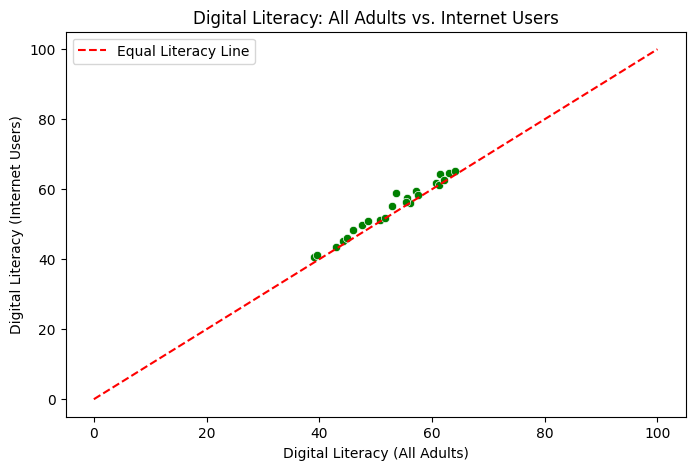

In [ ]:
# Scatter plot comparing digital literacy of all adults vs. internet users
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_digital["Digital Literacy (All Adults)"], y=df_digital["Digital Literacy (Internet Users)"], color="green")
plt.plot([0, 100], [0, 100], linestyle='dashed', color='red', label="Equal Literacy Line")
plt.xlabel("Digital Literacy (All Adults)")
plt.ylabel("Digital Literacy (Internet Users)")
plt.title("Digital Literacy: All Adults vs. Internet Users")
plt.legend()
plt.show()

In [ ]:
# Compute the average difference
df_digital["Literacy Gap"] = df_digital["Digital Literacy (Internet Users)"] - df_digital["Digital Literacy (All Adults)"]
print("\nAverage Difference in Digital Literacy (Internet Users - All Adults):", df_digital["Literacy Gap"].mean())


Average Difference in Digital Literacy (Internet Users - All Adults): 1.50912122802382


# **MODEL BUILDING**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving financial_recommender_dataset.xlsx to financial_recommender_dataset.xlsx


In [ ]:
# Get the filename from the uploaded dictionary
file_path = list(uploaded.keys())[0]

In [ ]:
# Load your data into a pandas DataFrame
df = pd.read_excel("financial_recommender_dataset.xlsx")

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Features to use for recommendation
features = ['Age', 'Gender', 'EmploymentStatus', 'FinancialGoal', 'PreferredInvestment', 'RiskTolerance', 'LiteracyLevel']


In [ ]:
# One-hot encode categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[features]).toarray()


In [ ]:
# Compute similarity matrix
similarity_matrix = cosine_similarity(encoded_features)

In [ ]:
# Function to get top N recommendations for a user
def recommend_products(user_index, top_n=3):
    similar_indices = similarity_matrix[user_index].argsort()[::-1][1:top_n+1]
    recommended = df.iloc[similar_indices]['RecommendedProduct']
    return recommended.tolist()


In [ ]:
from sklearn.metrics import precision_score, recall_score

def evaluate_precision_recall_at_k(k=3):
    precisions = []
    recalls = []

    for i in range(len(df)):
        actual = df.iloc[i]['RecommendedProduct']  # Or use df['ActualProduct'] if available
        predicted = recommend_products(i, top_n=k)

        # Convert to sets for comparison
        actual_set = {actual} if not isinstance(actual, list) else set(actual)
        predicted_set = set(predicted)

        true_positives = len(actual_set & predicted_set)

        precision = true_positives / len(predicted_set) if predicted_set else 0
        recall = true_positives / len(actual_set) if actual_set else 0

        precisions.append(precision)
        recalls.append(recall)

    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)

    print(f"Average Precision@{k}: {avg_precision:.2f}")
    print(f"Average Recall@{k}: {avg_recall:.2f}")

# Run evaluation
evaluate_precision_recall_at_k(k=3)


Average Precision@3: 0.16
Average Recall@3: 0.41
